In [1]:
# Read into a dataframe a CSV dataset with 10 example offices 
# described by 5 features (4 descriptive features: Size, Floor, BroadbandRate, EnergyRating;
# the target feature: RentalPrice).

# Library Imports.
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# Allows plots to appear directly in the notebook.
%matplotlib inline

from patsy import dmatrices
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score 

In [2]:
# Read a CSV dataset with 10 example offices into a dataframe.
# The data is described by 5 features (4 descriptive features: Size, Floor, BroadbandRate, EnergyRating;
# the target feature: RentalPrice).


# Read csv file into a dataframe.
df = pd.read_csv('CreditRisk_Clean_1-3_NewFeatures.csv')
df.head(10)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
0,Bad,71,68,4,33,10,0,0,100,125,...,71.0,5,4,0.0,100,0.152672,False,False,100.0,10
1,Good,73,85,6,40,17,1,0,94,11,...,NaN,3,2,0.0,36,0.531915,True,True,94.0,6
2,Bad,64,51,6,22,15,0,0,100,125,...,84.0,10,3,1.0,100,0.152672,False,False,62.0,24
3,Good,81,398,2,112,17,0,0,100,125,...,60.0,5,2,1.0,64,0.152672,False,False,94.0,11
4,Good,66,209,19,89,29,0,0,83,6,...,74.0,8,8,1.0,94,0.531915,True,True,97.0,28
5,Good,69,189,7,84,34,2,1,94,0,...,NaN,3,2,2.0,29,0.531915,True,True,94.0,10
6,Good,81,253,13,114,15,0,0,87,9,...,NaN,1,2,0.0,17,0.531915,True,True,100.0,2
7,Good,89,151,20,87,14,0,0,100,125,...,NaN,1,2,0.0,60,0.152672,False,False,100.0,8
8,Good,67,114,5,52,13,1,0,67,30,...,33.0,4,2,2.0,86,0.152672,True,False,87.0,12
9,Bad,71,170,9,88,43,2,2,93,6,...,100.0,8,4,1.0,60,0.531915,True,True,93.0,27


In [3]:
# find out how many rows to calculate percentages when creating trainning and testing datasets
len(df.index)

841

# (1.1) Randomly shuffle the rows of dataset and split the dataset into two datasets: 70% training and 30% test. Keep the test set aside.

In [4]:
# Random shuffling of the rows in the data frame - so as to be fair in our selection of the trainning and test data

df = df.reindex(np.random.permutation(df.index))
df.head(10)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
436,Bad,84,215,8,73,25,1,0,93,38,...,NaN,0,2,0.0,17,0.152672,True,False,93.0,4
775,Good,87,177,10,82,9,0,0,100,125,...,3.0,2,1,0.0,75,0.152672,False,False,100.0,6
74,Good,70,132,2,64,20,1,1,92,6,...,NaN,1,2,0.0,13,0.531915,True,True,77.0,3
110,Bad,65,243,2,77,26,1,0,90,7,...,100.0,2,4,0.5,86,0.531915,True,True,87.0,25
143,Bad,63,154,20,85,21,2,2,92,7,...,NaN,3,1,1.0,100,0.531915,True,True,84.0,25
21,Good,81,58,34,49,5,0,0,100,125,...,60.0,1,2,0.5,100,0.152672,False,False,100.0,5
38,Bad,56,136,3,8,11,0,0,100,125,...,90.0,5,2,0.0,64,0.152672,False,False,38.0,18
758,Bad,61,128,4,61,5,1,1,75,13,...,NaN,1,1,1.0,100,0.152672,True,False,62.0,8
455,Bad,86,294,9,118,16,0,0,100,125,...,NaN,2,2,0.0,44,0.152672,False,False,100.0,7
660,Bad,74,319,3,54,32,0,0,100,125,...,33.0,6,3,2.0,90,0.152672,False,False,100.0,28


In [5]:
# create variable to obtain what the 70% of the data set is
seventy_percent = round(len(df.index)/100*70)

# Create dataframe with the first 70% of the data and show the first 10 rows - this dataframe will be the trainning data
df_train = df[0:seventy_percent]
df_train.head(10)

,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
436,Bad,84,215,8,73,25,1,0,93,38,...,NaN,0,2,0.0,17,0.152672,True,False,93.0,4
775,Good,87,177,10,82,9,0,0,100,125,...,3.0,2,1,0.0,75,0.152672,False,False,100.0,6
74,Good,70,132,2,64,20,1,1,92,6,...,NaN,1,2,0.0,13,0.531915,True,True,77.0,3
110,Bad,65,243,2,77,26,1,0,90,7,...,100.0,2,4,0.5,86,0.531915,True,True,87.0,25
143,Bad,63,154,20,85,21,2,2,92,7,...,NaN,3,1,1.0,100,0.531915,True,True,84.0,25
21,Good,81,58,34,49,5,0,0,100,125,...,60.0,1,2,0.5,100,0.152672,False,False,100.0,5
38,Bad,56,136,3,8,11,0,0,100,125,...,90.0,5,2,0.0,64,0.152672,False,False,38.0,18
758,Bad,61,128,4,61,5,1,1,75,13,...,NaN,1,1,1.0,100,0.152672,True,False,62.0,8
455,Bad,86,294,9,118,16,0,0,100,125,...,NaN,2,2,0.0,44,0.152672,False,False,100.0,7
660,Bad,74,319,3,54,32,0,0,100,125,...,33.0,6,3,2.0,90,0.152672,False,False,100.0,28


In [6]:
# double check that it is infact 70 percent
print(len(df_train.index) == seventy_percent)
print(len(df_train.index))

True
589


In [7]:
# Create df_test as the remaining 30% of the data frame to apply the testing of the model

df_test = df[seventy_percent:]
print(len(df_test))
df_test.head(10)

252


,RiskPerformance,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,...,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,DelqEver,DelqLast12M,PercentSatisfactoryTrades,NumTradesWBalance
494,Bad,60,313,2,78,27,4,1,76,9,...,30.0,6,2,1.0,73,0.531915,True,True,82.0,24
708,Bad,63,203,4,78,40,0,0,98,63,...,88.0,3,4,2.0,70,0.152672,True,False,95.0,29
804,Bad,80,207,8,92,18,0,0,100,125,...,75.0,3,3,1.0,60,0.152672,False,False,100.0,10
519,Bad,75,113,97,105,2,0,0,100,125,...,NaN,2,2,1.0,100,0.152672,False,False,100.0,2
36,Bad,73,215,7,88,38,1,1,92,23,...,78.0,4,2,1.0,50,0.152672,True,False,95.0,20
444,Bad,68,116,1,51,20,0,0,100,125,...,NaN,6,1,2.0,64,0.152672,False,False,95.0,13
18,Bad,68,180,8,45,28,0,0,93,24,...,83.0,8,2,2.0,63,0.152672,True,False,88.0,20
385,Bad,82,324,43,137,9,0,0,90,79,...,NaN,1,2,0.0,25,0.152672,True,False,90.0,2
332,Bad,67,68,3,21,8,0,0,100,125,...,NaN,3,1,0.0,67,0.152672,False,False,100.0,5
582,Bad,75,224,4,63,18,1,0,84,10,...,NaN,4,1,1.0,56,0.531915,True,True,95.0,10


In [8]:
# Ensure that the two dataframes created are indeed 70% and 30% and add up to the total of rows
# 100% of the dataframe was 937 rows - above shows 656 rows for the 70% df and 281 rows for the 30% df totaling 937 rows
# or 100%

print((seventy_percent) + round(len(df.index)/100*30))
print(len(df_test) + len(df_train))

841
841


# - (1.2) On the training set:
## - Plot the correlations between all the continuous features. Discuss what you see in these plots.

In [9]:
# Check which are the continuous features
df_train.dtypes

RiskPerformance                        object
ExternalRiskEstimate                    int64
MSinceOldestTradeOpen                   int64
MSinceMostRecentTradeOpen               int64
AverageMInFile                          int64
NumSatisfactoryTrades                   int64
NumTrades60Ever2DerogPubRec             int64
NumTrades90Ever2DerogPubRec             int64
PercentTradesNeverDelq                  int64
MSinceMostRecentDelq                    int64
MaxDelq2PublicRecLast12M                int64
MaxDelqEver                             int64
NumTotalTrades                          int64
NumTradesOpeninLast12M                  int64
PercentInstallTrades                    int64
MSinceMostRecentInqexcl7days            int64
NumInqLast6M                            int64
NumInqLast6Mexcl7days                   int64
NetFractionRevolvingBurden              int64
NetFractionInstallBurden              float64
NumRevolvingTradesWBalance              int64
NumInstallTradesWBalance          

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5, 14.5, 15.5, 16.5, 17.5, 18.5, 19.5, 20.5, 21.5,
        22.5, 23.5]), <a list of 24 Text xticklabel objects>)

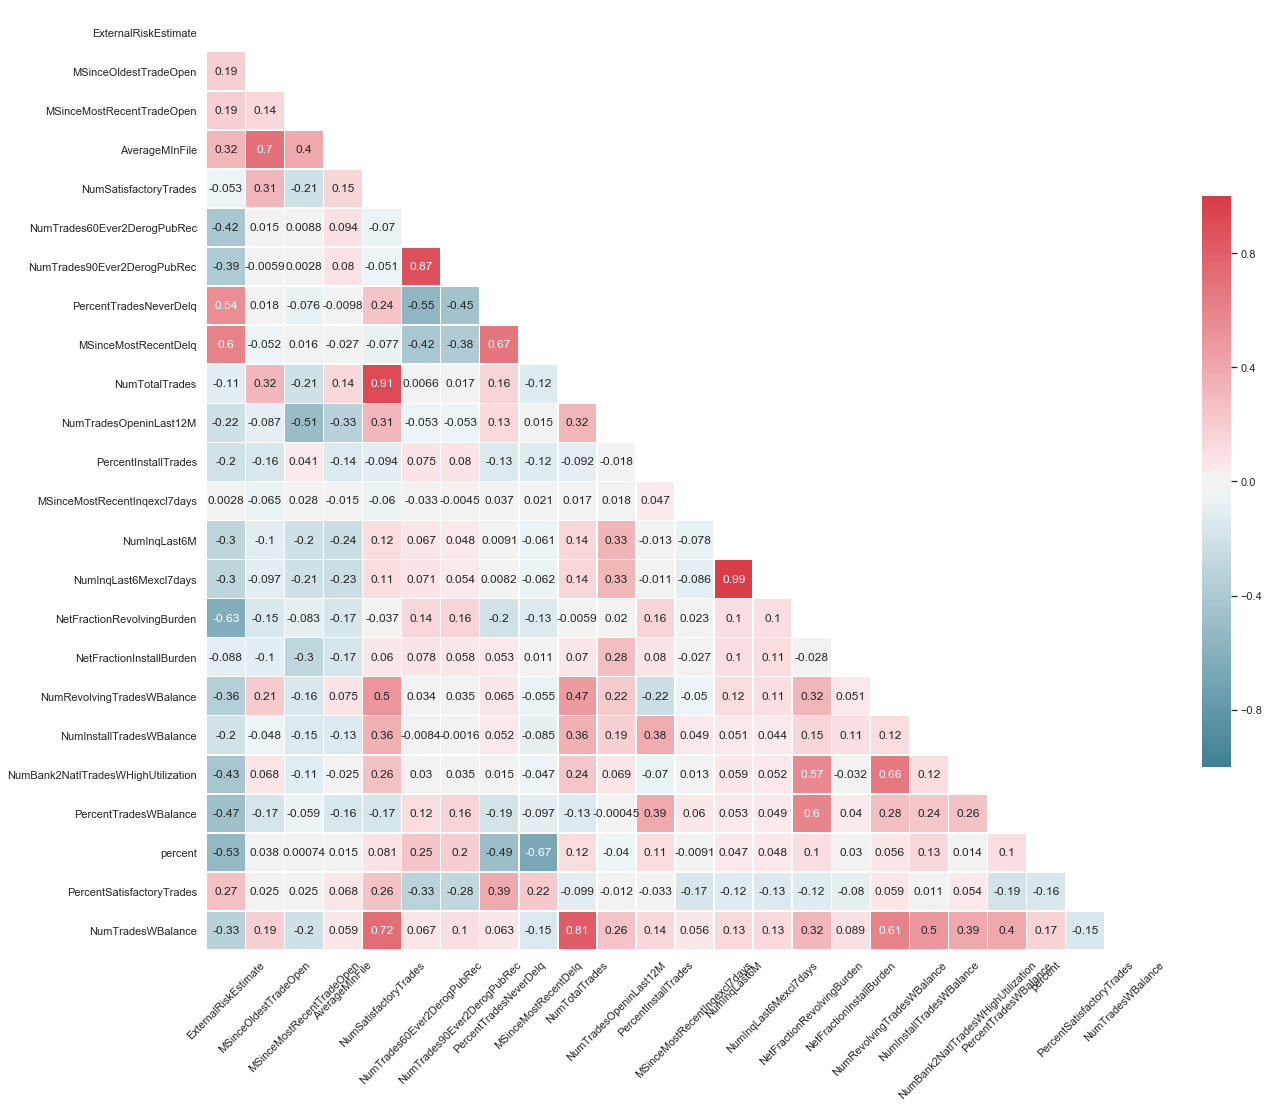

In [10]:
# # Correlation matrix using code found on https://stanford.edu/~mwaskom/software/seaborn/examples/many_pairwise_correlations.html
sns.set(style="white")

# Select columns containing continuous data
df_continuous_columns = df_train.select_dtypes(include=['int64', 'float64'])

# Drop MaxDelq2PublicRecLast12M and MaxDelqEver as eventhough of numerical nature each number is a meaning therefore 
# the features are categorical
df_continuous_columns = df_continuous_columns.drop('MaxDelq2PublicRecLast12M', 1)
df_continuous_columns = df_continuous_columns.drop('MaxDelqEver', 1)

# Calculate correlation of all pairs of continuous features
corr = df_continuous_columns.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(21, 21))

# Generate a custom colormap - blue and red
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, vmax=1, vmin=-1,
            square=True, xticklabels=True, yticklabels=True,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)
plt.yticks(rotation = 0)
plt.xticks(rotation = 45)



- A scatter plot matrix was attempted in order to map the correlation between all the continous features. 

- TA tanh has advised that a heat map should be obtained from all the continuous features to show correlation between all the features and from the heatmap the ones with the biggest correlations should be charted with an individual scatter plott as creating a scatter plot matrix was not displaying correctly in jupyter notebooks due to the sheer amount of them.

- Same issue though in a much reduced manner compared to the scatter plot matrix occurrs with the heatmap. It is appreciated that the feature labels in the x-axis are not properly aligned.  

In [11]:
# Additionally Look at correlations for all the continuous features in table form.
df_continuous_columns.corr()

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,...,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,PercentSatisfactoryTrades,NumTradesWBalance
ExternalRiskEstimate,1.000000,0.194410,0.193965,0.324448,-0.052984,-0.420465,-0.385841,0.539129,0.602252,-0.106304,...,-0.297086,-0.631372,-0.088482,-0.359311,-0.200909,-0.432797,-0.470834,-0.526650,0.267446,-0.333164
MSinceOldestTradeOpen,0.194410,1.000000,0.136771,0.698078,0.313549,0.014804,-0.005893,0.018102,-0.051793,0.320001,...,-0.097366,-0.152067,-0.104755,0.208277,-0.048178,0.067747,-0.172198,0.037976,0.025262,0.190069
MSinceMostRecentTradeOpen,0.193965,0.136771,1.000000,0.397145,-0.208910,0.008823,0.002824,-0.076079,0.015783,-0.209148,...,-0.207471,-0.083041,-0.295943,-0.163411,-0.148266,-0.114016,-0.059315,0.000744,0.024795,-0.203842
AverageMInFile,0.324448,0.698078,0.397145,1.000000,0.152951,0.093790,0.080316,-0.009790,-0.026545,0.137817,...,-0.230472,-0.169310,-0.173583,0.075283,-0.134083,-0.024693,-0.163450,0.015210,0.068174,0.059053
NumSatisfactoryTrades,-0.052984,0.313549,-0.208910,0.152951,1.000000,-0.070298,-0.050967,0.243724,-0.076900,0.911906,...,0.113455,-0.036902,0.059955,0.504456,0.356510,0.264732,-0.172829,0.080537,0.259987,0.721099
NumTrades60Ever2DerogPubRec,-0.420465,0.014804,0.008823,0.093790,-0.070298,1.000000,0.867435,-0.553563,-0.418718,0.006597,...,0.070688,0.144742,0.077833,0.034236,-0.008399,0.030350,0.121012,0.245443,-0.325647,0.066610
NumTrades90Ever2DerogPubRec,-0.385841,-0.005893,0.002824,0.080316,-0.050967,0.867435,1.000000,-0.449654,-0.376080,0.017098,...,0.053697,0.158512,0.057720,0.035254,-0.001579,0.035100,0.162847,0.201962,-0.282420,0.103610
PercentTradesNeverDelq,0.539129,0.018102,-0.076079,-0.009790,0.243724,-0.553563,-0.449654,1.000000,0.673468,0.161966,...,0.008192,-0.199088,0.052539,0.064559,0.051844,0.015393,-0.188600,-0.492182,0.388553,0.062967
MSinceMostRecentDelq,0.602252,-0.051793,0.015783,-0.026545,-0.076900,-0.418718,-0.376080,0.673468,1.000000,-0.122386,...,-0.062171,-0.133832,0.011439,-0.055047,-0.085281,-0.046925,-0.096552,-0.669610,0.223671,-0.146066
NumTotalTrades,-0.106304,0.320001,-0.209148,0.137817,0.911906,0.006597,0.017098,0.161966,-0.122386,1.000000,...,0.142079,-0.005928,0.070149,0.474750,0.358631,0.241255,-0.133453,0.122110,-0.098599,0.807514


- We select the correlation features that are over 0.50 as according to https://www.statisticssolutions.com/correlation-pearson-kendall-spearman/ coefficients of .50 and above represent a large association or relationship while correlation coefficients between .10 and .29 represent a small association, coefficients between .30 and .49 represent a medium association. **Essentially we are looking for strong correlation only**

In [12]:
# We select the correlation features that are over 0.50 as according to 

relevant_features = corr[(corr > 0.5) & (corr<1)]
relevant_features

,ExternalRiskEstimate,MSinceOldestTradeOpen,MSinceMostRecentTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,...,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NetFractionInstallBurden,NumRevolvingTradesWBalance,NumInstallTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,percent,PercentSatisfactoryTrades,NumTradesWBalance
ExternalRiskEstimate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.539129,0.602252,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceOldestTradeOpen,NaN,NaN,NaN,0.698078,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceMostRecentTradeOpen,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageMInFile,NaN,0.698078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumSatisfactoryTrades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.911906,...,NaN,NaN,NaN,0.504456,NaN,NaN,NaN,NaN,NaN,0.721099
NumTrades60Ever2DerogPubRec,NaN,NaN,NaN,NaN,NaN,NaN,0.867435,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumTrades90Ever2DerogPubRec,NaN,NaN,NaN,NaN,NaN,0.867435,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PercentTradesNeverDelq,0.539129,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.673468,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceMostRecentDelq,0.602252,NaN,NaN,NaN,NaN,NaN,NaN,0.673468,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumTotalTrades,NaN,NaN,NaN,NaN,0.911906,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.807514


In [13]:
relevant_features[relevant_features[relevant_features.columns[0]].isna()==False][relevant_features.columns[0]]

PercentTradesNeverDelq    0.539129
MSinceMostRecentDelq      0.602252
Name: ExternalRiskEstimate, dtype: float64

### Select only the features that have a correlation of 0.5 and more but not the ones that are the same

- If any of the column has no correlation of 0.5 or more drop the column

In [14]:
# Select the features with the highest correlation
remove = []

for i in range(0,len(relevant_features.columns)):
    print("Feature is: ", relevant_features.columns[i])
    print(relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]])
    
    col = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==True][relevant_features.columns[i]]
    if col.size == 24:
        remove.append(relevant_features.columns[i])
        print("to be Removed: ", relevant_features.columns[i])
    print("\n" * 2)
    
# print(remove)

for i, k in enumerate(remove):
    relevant_features = relevant_features.drop(k, 1)
    relevant_features = relevant_features.drop(k, 0)

print("remove.lenght is: ", len(remove))   
print("Columns are: ", relevant_features.columns)
print("Size is: ", relevant_features.columns.size)
    

Feature is:  ExternalRiskEstimate
PercentTradesNeverDelq    0.539129
MSinceMostRecentDelq      0.602252
Name: ExternalRiskEstimate, dtype: float64



Feature is:  MSinceOldestTradeOpen
AverageMInFile    0.698078
Name: MSinceOldestTradeOpen, dtype: float64



Feature is:  MSinceMostRecentTradeOpen
Series([], Name: MSinceMostRecentTradeOpen, dtype: float64)
to be Removed:  MSinceMostRecentTradeOpen



Feature is:  AverageMInFile
MSinceOldestTradeOpen    0.698078
Name: AverageMInFile, dtype: float64



Feature is:  NumSatisfactoryTrades
NumTotalTrades                0.911906
NumRevolvingTradesWBalance    0.504456
NumTradesWBalance             0.721099
Name: NumSatisfactoryTrades, dtype: float64



Feature is:  NumTrades60Ever2DerogPubRec
NumTrades90Ever2DerogPubRec    0.867435
Name: NumTrades60Ever2DerogPubRec, dtype: float64



Feature is:  NumTrades90Ever2DerogPubRec
NumTrades60Ever2DerogPubRec    0.867435
Name: NumTrades90Ever2DerogPubRec, dtype: float64



Feature is:  PercentTradesNe

In [15]:
relevant_features

,ExternalRiskEstimate,MSinceOldestTradeOpen,AverageMInFile,NumSatisfactoryTrades,NumTrades60Ever2DerogPubRec,NumTrades90Ever2DerogPubRec,PercentTradesNeverDelq,MSinceMostRecentDelq,NumTotalTrades,NumInqLast6M,NumInqLast6Mexcl7days,NetFractionRevolvingBurden,NumRevolvingTradesWBalance,NumBank2NatlTradesWHighUtilization,PercentTradesWBalance,NumTradesWBalance
ExternalRiskEstimate,NaN,NaN,NaN,NaN,NaN,NaN,0.539129,0.602252,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceOldestTradeOpen,NaN,NaN,0.698078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AverageMInFile,NaN,0.698078,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumSatisfactoryTrades,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.911906,NaN,NaN,NaN,0.504456,NaN,NaN,0.721099
NumTrades60Ever2DerogPubRec,NaN,NaN,NaN,NaN,NaN,0.867435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumTrades90Ever2DerogPubRec,NaN,NaN,NaN,NaN,0.867435,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PercentTradesNeverDelq,0.539129,NaN,NaN,NaN,NaN,NaN,NaN,0.673468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MSinceMostRecentDelq,0.602252,NaN,NaN,NaN,NaN,NaN,0.673468,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
NumTotalTrades,NaN,NaN,NaN,0.911906,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.807514
NumInqLast6M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.99034,NaN,NaN,NaN,NaN,NaN


In [16]:
needed = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].index
needed

Index(['ExternalRiskEstimate', 'PercentTradesNeverDelq'], dtype='object')

In [21]:
values = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].values
values

array([0.60225237, 0.67346773])

In [22]:
col_size = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].size
col_size

2

### Draw up Scatter Plots

C:\Users\User\Anaconda3\envs\comp47350py37\lib\site-packages\ipykernel_launcher.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or 

FEATURE IS:  ExternalRiskEstimate
Needs to correlate with:  Index(['PercentTradesNeverDelq', 'MSinceMostRecentDelq'], dtype='object')

Create correlation between: 
x is:  ExternalRiskEstimate
y is:  PercentTradesNeverDelq
value is:  0.5391288186352075

x is:  ExternalRiskEstimate
y is:  MSinceMostRecentDelq
value is:  0.6022523680336735




x-----------------------------------------------------------------x
FEATURE IS:  MSinceOldestTradeOpen
Needs to correlate with:  Index(['AverageMInFile'], dtype='object')

Create correlation between: 
x is:  MSinceOldestTradeOpen
y is:  AverageMInFile
value is:  0.6980775959192462




x-----------------------------------------------------------------x
FEATURE IS:  AverageMInFile
Needs to correlate with:  Index(['MSinceOldestTradeOpen'], dtype='object')

Create correlation between: 
Pair already checked!




x-----------------------------------------------------------------x
FEATURE IS:  NumSatisfactoryTrades
Needs to correlate with:  Index(['NumTota

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches





x-----------------------------------------------------------------x
FEATURE IS:  NumTrades60Ever2DerogPubRec
Needs to correlate with:  Index(['NumTrades90Ever2DerogPubRec'], dtype='object')

Create correlation between: 
x is:  NumTrades60Ever2DerogPubRec
y is:  NumTrades90Ever2DerogPubRec
value is:  0.8674346137245864




x-----------------------------------------------------------------x
FEATURE IS:  NumTrades90Ever2DerogPubRec
Needs to correlate with:  Index(['NumTrades60Ever2DerogPubRec'], dtype='object')

Create correlation between: 
Pair already checked!




x-----------------------------------------------------------------x
FEATURE IS:  PercentTradesNeverDelq
Needs to correlate with:  Index(['ExternalRiskEstimate', 'MSinceMostRecentDelq'], dtype='object')

Create correlation between: 
Pair already checked!

x is:  PercentTradesNeverDelq
y is:  MSinceMostRecentDelq
value is:  0.673467734842118




x-----------------------------------------------------------------x
FEATURE IS: 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.






x-----------------------------------------------------------------x
FEATURE IS:  NumRevolvingTradesWBalance
Needs to correlate with:  Index(['NumSatisfactoryTrades', 'NumBank2NatlTradesWHighUtilization',
       'NumTradesWBalance'],
      dtype='object')

Create correlation between: 
Pair already checked!

x is:  NumRevolvingTradesWBalance
y is:  NumBank2NatlTradesWHighUtilization
value is:  0.6584309718702739

x is:  NumRevolvingTradesWBalance
y is:  NumTradesWBalance
value is:  0.6060974638751455




x-----------------------------------------------------------------x
FEATURE IS:  NumBank2NatlTradesWHighUtilization
Needs to correlate with:  Index(['NetFractionRevolvingBurden', 'NumRevolvingTradesWBalance'], dtype='object')

Create correlation between: 
Pair already checked!

Pair already checked!




x-----------------------------------------------------------------x
FEATURE IS:  PercentTradesWBalance
Needs to correlate with:  Index(['NetFractionRevolvingBurden'], dtype='object')


[('PercentTradesNeverDelq', 'ExternalRiskEstimate', 0.5391288186352075),
 ('MSinceMostRecentDelq', 'ExternalRiskEstimate', 0.6022523680336735),
 ('AverageMInFile', 'MSinceOldestTradeOpen', 0.6980775959192462),
 ('NumTotalTrades', 'NumSatisfactoryTrades', 0.9119060752686722),
 ('NumRevolvingTradesWBalance', 'NumSatisfactoryTrades', 0.5044559445666231),
 ('NumTradesWBalance', 'NumSatisfactoryTrades', 0.7210991417331671),
 ('NumTrades90Ever2DerogPubRec',
  'NumTrades60Ever2DerogPubRec',
  0.8674346137245864),
 ('MSinceMostRecentDelq', 'PercentTradesNeverDelq', 0.673467734842118),
 ('NumTradesWBalance', 'NumTotalTrades', 0.8075138233926783),
 ('NumInqLast6Mexcl7days', 'NumInqLast6M', 0.990339935547944),
 ('NumBank2NatlTradesWHighUtilization',
  'NetFractionRevolvingBurden',
  0.5676490717109366),
 ('PercentTradesWBalance', 'NetFractionRevolvingBurden', 0.5967096903454967),
 ('NumBank2NatlTradesWHighUtilization',
  'NumRevolvingTradesWBalance',
  0.6584309718702739),
 ('NumTradesWBalance', 

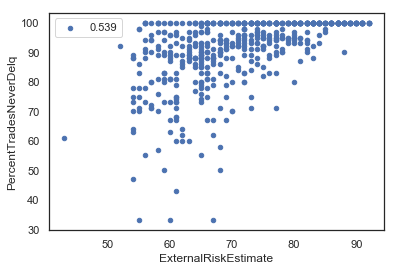

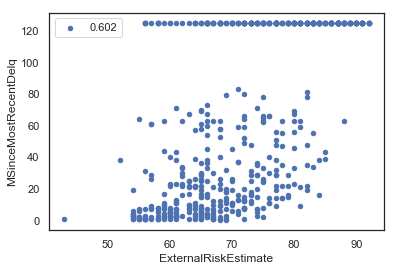

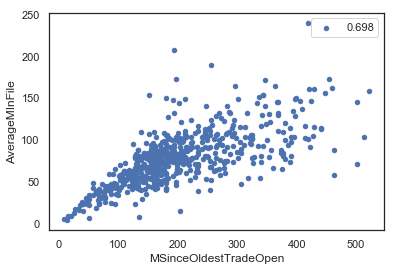

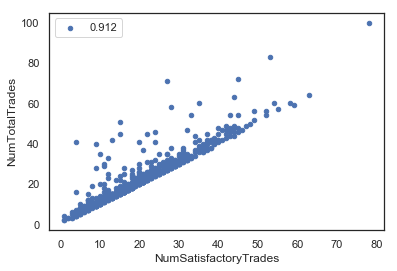

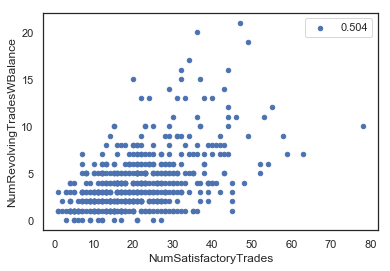

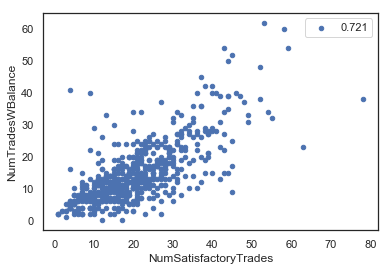

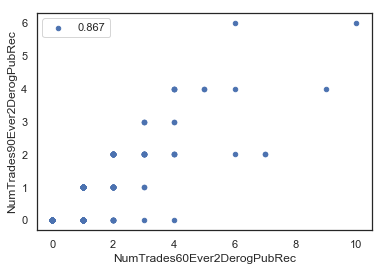

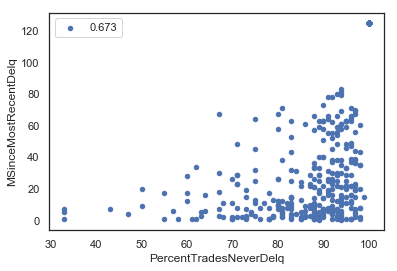

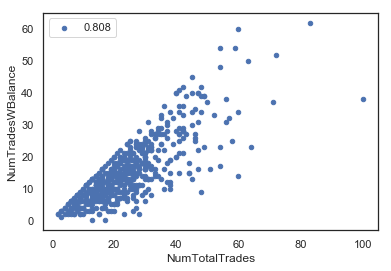

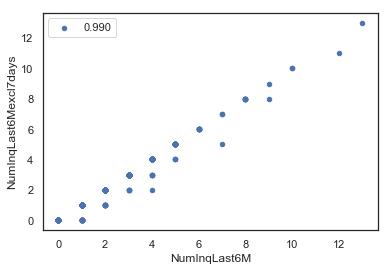

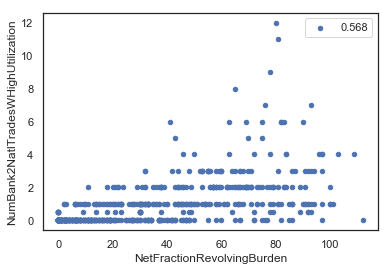

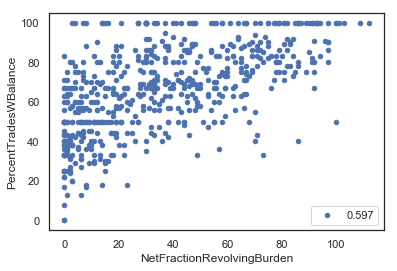

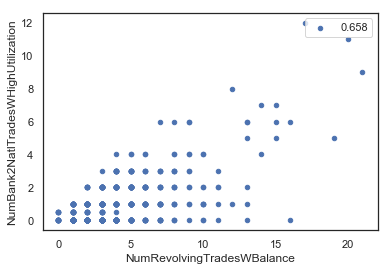

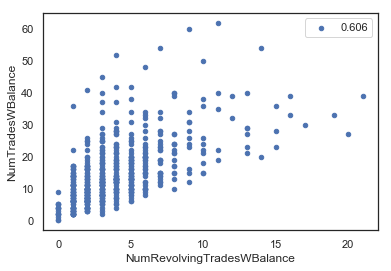

In [25]:
compare_list = []

# Select each column
for i in range(0,len(relevant_features.columns)):
    needed = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].index
    values = relevant_features[relevant_features[relevant_features.columns[i]].isnull()==False][relevant_features.columns[i]].values
    print("FEATURE IS: ", relevant_features.columns[i])
    print("Needs to correlate with: ", needed)
    print()
    print("Create correlation between: ")
    
    # Select each needed row within each column
    for j in range(0, len(needed)):
        # if the correlation has already been plotted don't do it again
        if (relevant_features.columns[i], needed[j], values[j]) not in compare_list:
            print("x is: ", relevant_features.columns[i])
            print("y is: ", needed[j])
            print("value is: ", values[j])
            
            # Plot the scatter plot
            df_continuous_columns.plot(kind='scatter', x=relevant_features.columns[i], y=needed[j], label="%.3f" % df_continuous_columns[[relevant_features.columns[i], needed[j]]].corr().as_matrix()[0,1])
            
            # add the correlation to the list so that it is not plotted again
            compare_list.append((needed[j], relevant_features.columns[i], values[j]))
            print()
            
        # If they have already been checked print a message
        if (relevant_features.columns[i], needed[j], values[j]) in compare_list:
            print("Pair already checked!")
            print()
    print("\n" * 2)
    print("x" + "-" * 65 + "x")
    

# Show the comparison list for debugging purposes
compare_list

## The feature pairs that show the highest positive correlations are:

In [42]:
compare_list = sorted(compare_list, key=lambda value: value[2])
compare_list
for i in range(len(compare_list)):
    print("- ", compare_list[i][0], "with", compare_list[i][1], "= ", compare_list[i][2])


-  NumRevolvingTradesWBalance with NumSatisfactoryTrades =  0.5044559445666231
-  PercentTradesNeverDelq with ExternalRiskEstimate =  0.5391288186352075
-  NumBank2NatlTradesWHighUtilization with NetFractionRevolvingBurden =  0.5676490717109366
-  PercentTradesWBalance with NetFractionRevolvingBurden =  0.5967096903454967
-  MSinceMostRecentDelq with ExternalRiskEstimate =  0.6022523680336735
-  NumTradesWBalance with NumRevolvingTradesWBalance =  0.6060974638751455
-  NumBank2NatlTradesWHighUtilization with NumRevolvingTradesWBalance =  0.6584309718702739
-  MSinceMostRecentDelq with PercentTradesNeverDelq =  0.673467734842118
-  AverageMInFile with MSinceOldestTradeOpen =  0.6980775959192462
-  NumTradesWBalance with NumSatisfactoryTrades =  0.7210991417331671
-  NumTradesWBalance with NumTotalTrades =  0.8075138233926783
-  NumTrades90Ever2DerogPubRec with NumTrades60Ever2DerogPubRec =  0.8674346137245864
-  NumTotalTrades with NumSatisfactoryTrades =  0.9119060752686722
-  NumInqLa